In [59]:
import numpy as np
import matplotlib.pyplot as plt


In [60]:
#generating dummy data for visualization
X = np.arange(10)
Y = (X-5)**2 + 3

print(X, Y)

[0 1 2 3 4 5 6 7 8 9] [28 19 12  7  4  3  4  7 12 19]


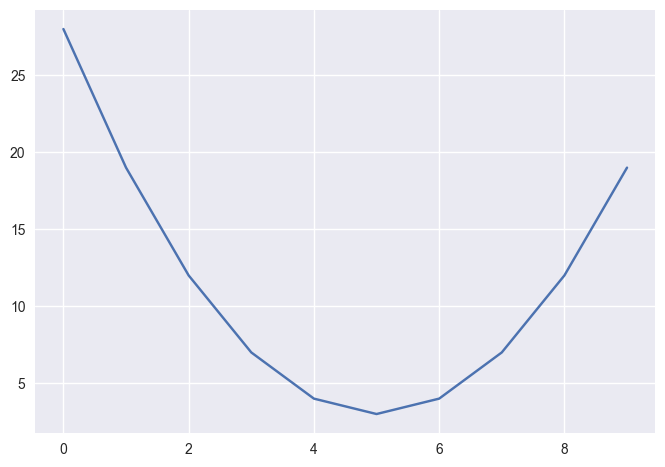

In [61]:
#Visualization
plt.style.use("seaborn-v0_8") # Changed to a valid style
plt.plot(X, Y)
plt.show()

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573


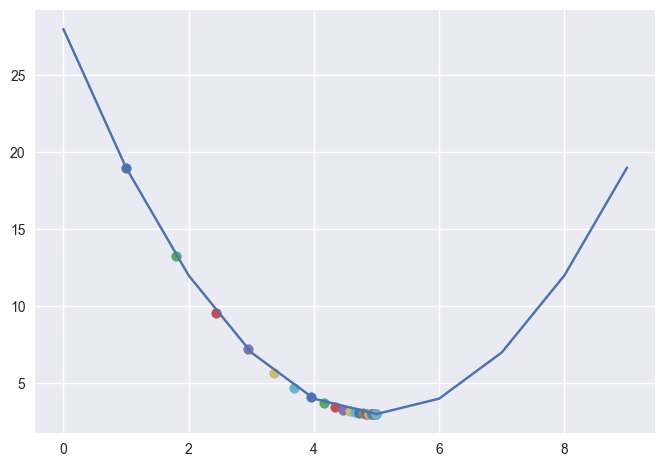

In [62]:
#gradient descent
x = 0
lr = 0.1
plt.plot(X, Y)
for i in range(30):
    grad = 2* (x - 5)
    x = x - lr * grad
    y = (x-5)**2 + 3
    plt.scatter(x, y)
    print(x)

plt.show()

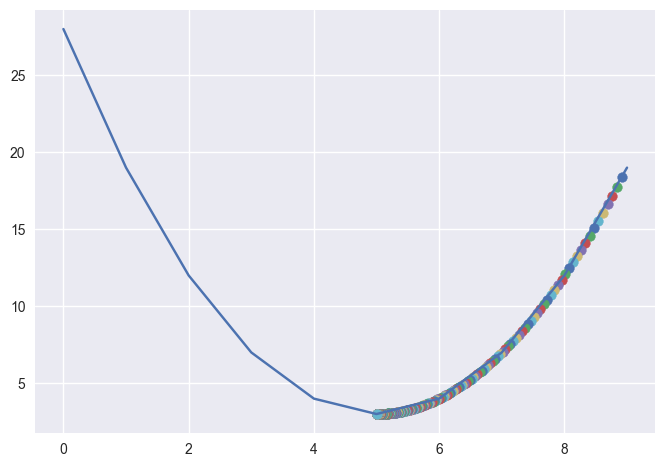

In [63]:
x = 9
lr = .01
plt.plot(X, Y)
for i in range(300):
    grad = 2* (x - 5)
    x = x - lr * grad
    y = (x-5)**2 + 3
    plt.scatter(x, y)

plt.style.use("seaborn-v0_8")
plt.show()

In [64]:
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def generateDataset(m):
  m = 100
  X = np.random.randn(m)*10
  noise = np.random.randn(m)
  y =3*X + 1 + 5*noise
  return X, y

In [66]:
X, y = generateDataset(10)
print(X.shape, y.shape)

(100,) (100,)


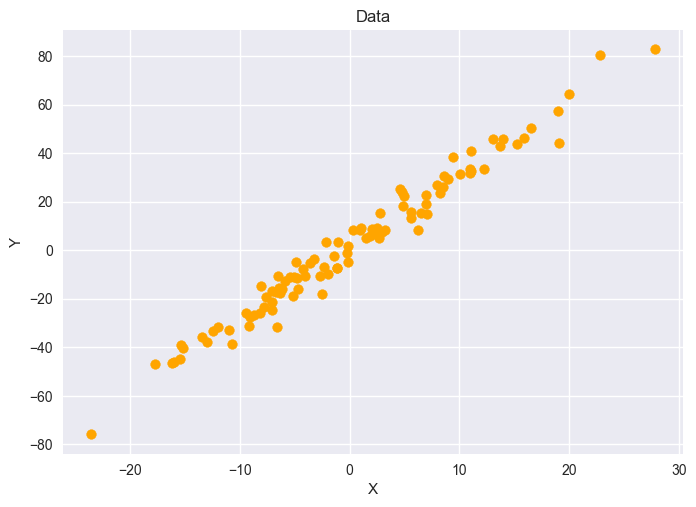

In [67]:
def plotDate(X, y, colour = "orange", title="Data"):
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.scatter(X, y, c = colour)
  plt.show()

plotDate(X, y)

In [68]:
def normaliseDate(X):
  X_mean = np.mean(X)
  X_std = np.std(X)
  xhat=(X - X_mean)/X_std
  return xhat

-2.997602166487923e-17 0.9999999999999999


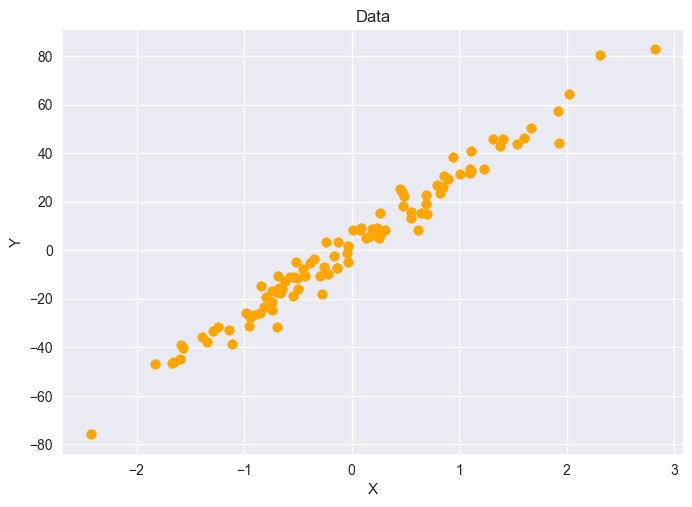

In [69]:
def normaliseDate(X):
  X_mean = np.mean(X)
  X_std = np.std(X)
  xhat=(X - X_mean)/X_std
  return xhat

xhat = normaliseDate(X)
print(xhat.mean(), xhat.std())

plotDate(xhat, y, title="Data")

In [70]:
import numpy as np

def traintestsplit(X, y, split=0.8):
  m = X.shape[0]
  data = np.zeros((m, 2))

  data[:, 0] = X
  data[:, 1] = y
  
  np.random.shuffle(data)

  train_size = int(m*split) #80% of the data
  
  X_train = data[:train_size, 0]
  y_train = data[:train_size, 1]
  X_test = data[train_size:, 0]
  y_test = data[train_size:, 1]
  return X_train, y_train, X_test, y_test

In [71]:
X_train, y_train, X_test, y_test = traintestsplit(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


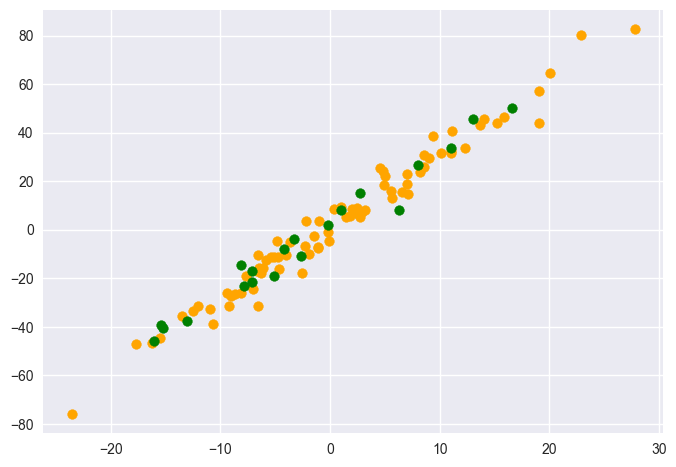

In [72]:
plt.scatter(X_train, y_train, c = "orange")
plt.scatter(X_test, y_test, c = "green")
plt.show()

-3.6356325295730385 -291.094480305041


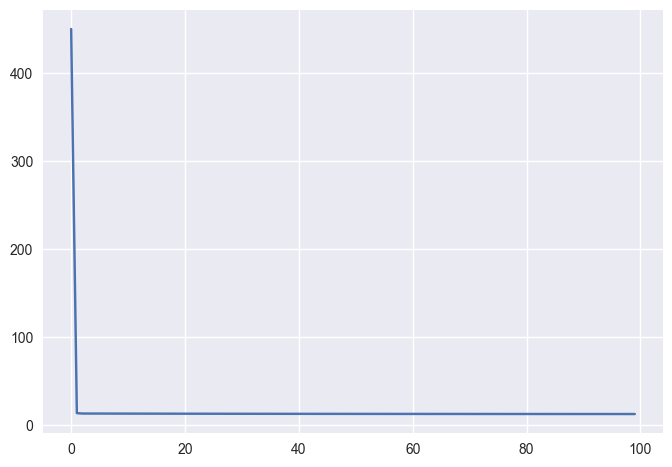

Learned parameters: [0.7696178  2.99864646]


In [73]:
#hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1]*X

def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y[i] - y_)**2
    return e/(2*m)

def gradient(X, y, theta):
    m = X.shape[0]
    grad0 = 0
    grad1 = 0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        grad0 += (y_ - y[i])
        grad1 += (y_ - y[i]) * X[i]
    return grad0/m, grad1/m

grad0, grad1 = gradient(X_train, y_train, [0, 0])
print(grad0, grad1)

def train(x, y, lr=0.01):
    theta = np.zeros((2,))
    max_iters = 100
    error_list = []

    for i in range(max_iters):
        error_list.append(error(x, y, theta))
        grad0, grad1 = gradient(x, y, theta)
        theta[0] = theta[0] - lr * grad0
        theta[1] = theta[1] - lr * grad1
    plt.plot(error_list)
    plt.show()
    return theta

# Train the model and plot error inside the function
theta = train(X_train, y_train)
print("Learned parameters:", theta)

In [74]:
def predict(X, theta):
    return hypothesis(X, theta)

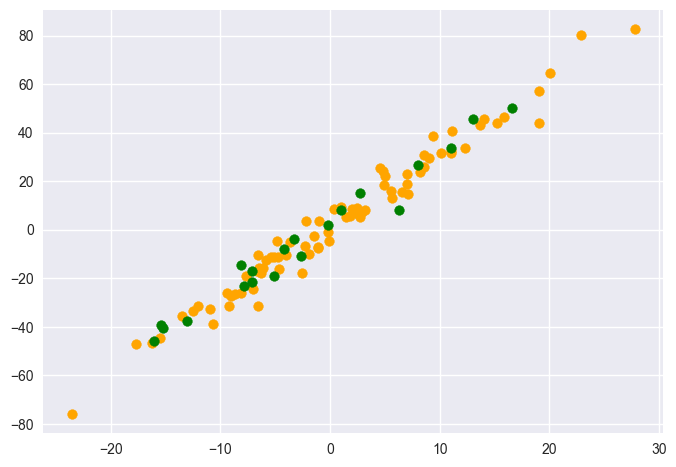

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_train, y_train, c = "orange")
plt.scatter(X_test, y_test, c = "green")
plt.show()

In [76]:
predict(X_test, theta)

array([  3.70311348,  19.48022253, -20.46453099, -14.6603035 ,
       -47.25585586,  -9.0156662 , -11.83844751, -38.32621046,
       -44.86525205, -45.43381406, -23.5759181 , -22.72619299,
         0.27434107,  24.68272482,  -7.24986034,   9.0673804 ,
       -20.47003979,  39.83111054,  50.36579387,  33.73637748])

In [77]:
X_test.shape

(20,)

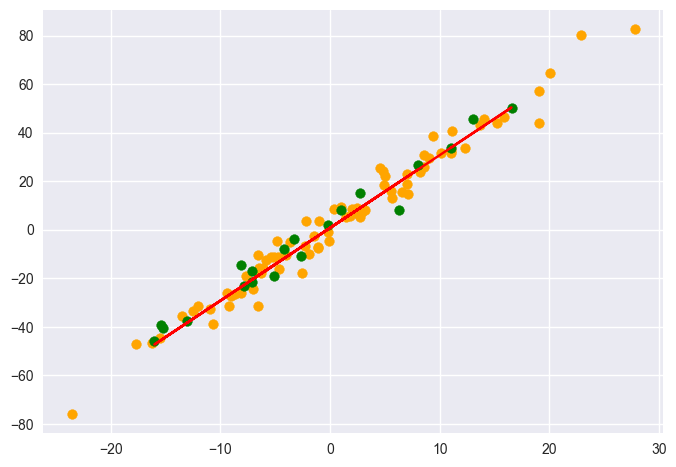

In [78]:
plt.style.use("seaborn-v0_8")
plt.scatter(X_train, y_train, c = "orange", label = "Train Data")
plt.scatter(X_test, y_test, c = "green", label = "Test Data")
y_pred = predict(X_test, theta)
plt.plot(X_test, y_pred, c = "red", label = "Prediction")     


In [79]:
#R2 squared model evaluation metric
#coefficient of determination regresion predictions approximate the real data points
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    denominator = np.sum((y_true - y_mean)**2)
    numerator = np.sum((y_true - y_pred)**2)
    r2 = 1 - (numerator / denominator)
    return r2

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.9695768927165874


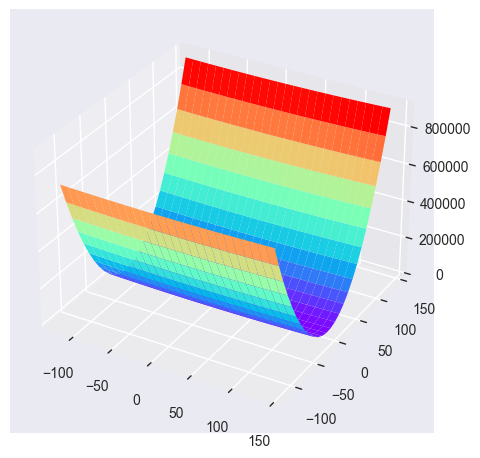

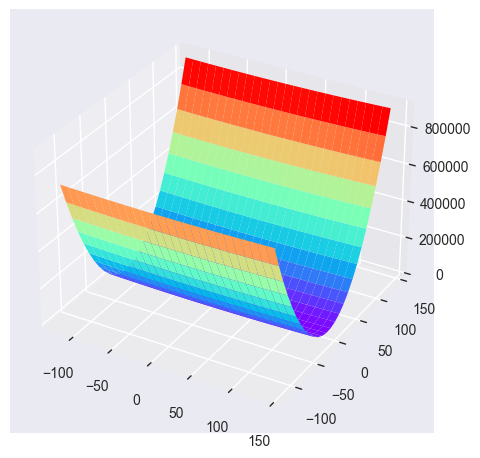

In [80]:
# visualising the training and test data along with the prediction
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0_mesh, T1_mesh = np.meshgrid(T0, T1)
J = np.zeros(T0_mesh.shape)
for i in range(T0_mesh.shape[0]):
    for j in range(T0_mesh.shape[1]):
        theta_tmp = [T0_mesh[i, j], T1_mesh[i, j]]
        y_pred_tmp = theta_tmp[0] + theta_tmp[1] * X
        J[i, j] = np.mean((y - y_pred_tmp) ** 2) / 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0_mesh, T1_mesh, J, cmap='rainbow')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0_mesh, T1_mesh, J, cmap='rainbow')
plt.show()

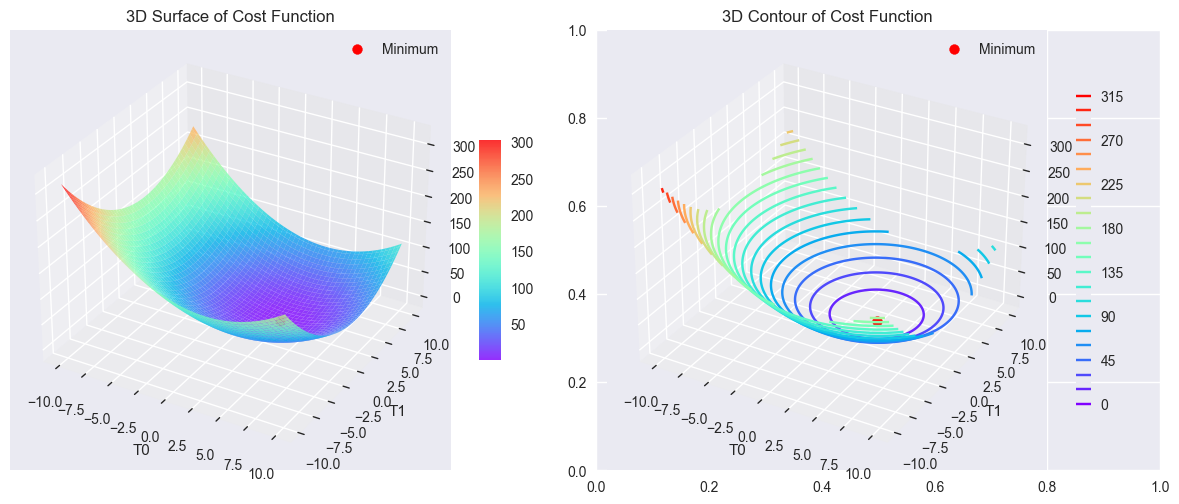

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Example setup ---
# Let's say our cost function J = (T0 - 3)**2 + (T1 - 2)**2 (simple paraboloid)
T0 = np.linspace(-10, 10, 100)
T1 = np.linspace(-10, 10, 100)
T0_mesh, T1_mesh = np.meshgrid(T0, T1)
J = (T0_mesh - 3)**2 + (T1_mesh - 2)**2

# --- 3D Surface Plot ---
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(T0_mesh, T1_mesh, J, cmap='rainbow', alpha=0.8)
ax1.set_title("3D Surface of Cost Function")
ax1.set_xlabel('T0')
ax1.set_ylabel('T1')
ax1.set_zlabel('J')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# --- 2D Contour Plot ---
#ax2 = fig.add_subplot(1, 2, 2)
#contour = ax2.contour(T0_mesh, T1_mesh, J, levels=20, cmap='rainbow')
#ax2.set_title("2D Contour of Cost Function")
#ax2.set_xlabel('T0')
#ax2.set_ylabel('T1')
#fig.colorbar(contour, ax=ax2, shrink=0.7)
grad0, grad1 = gradient(X_train, y_train, [0, 0])
print(grad0, grad1)

def train(x, y, lr=0.01):
    theta = np.zeros((2,))
    max_iters = 100
    error_list = []
    theta_list = np.zeros((max_iters, 2))

    for i in range(max_iters):
        error_list.append(error(x, y, theta))
        grad0, grad1 = gradient(x, y, theta)
        theta[0] = theta[0] - lr * grad0
        theta[1] = theta[1] - lr * grad1
    plt.plot(error_list)
    plt.show()
    return theta, theta_list, error_list

# Train the model and plot error inside the function
theta = train(X_train, y_train)
print("Learned parameters:", theta)
#3d contour plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
contour = ax2.contour3D(T0_mesh, T1_mesh, J, levels=20, cmap='rainbow')
ax.scatter(theta_list[:, 0], theta_list[:, 1], error_list, color='black', s=10)
ax2.set_title("3D Contour of Cost Function")
ax2.set_xlabel('T0')
ax2.set_ylabel('T1')
ax2.set_zlabel('J')
fig.colorbar(contour, ax=ax2, shrink=0.7)


# Highlight the minimum point (T0=3, T1=2)
ax1.scatter(3, 2, 0, color='red', s=50, label='Minimum')
ax1.legend()
ax2.scatter(3, 2, color='red', s=50, label='Minimum')
ax2.legend()

plt.tight_layout()
plt.show()


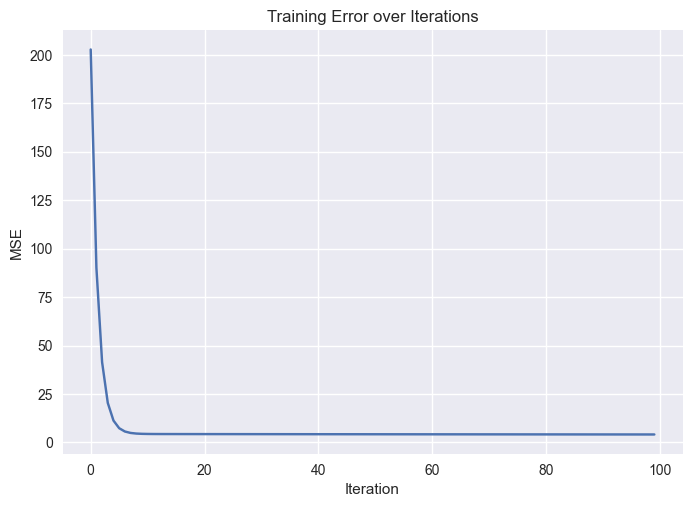

Learned parameters: [0.71188133 2.32654784]


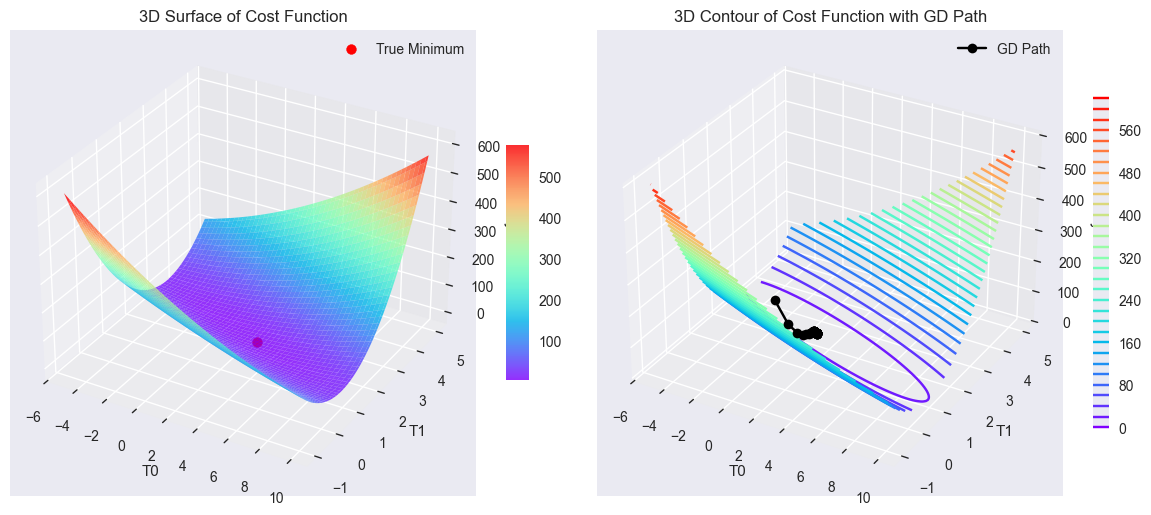

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Example data
# -----------------------------
X_train = np.linspace(0, 10, 100)
y_train = 3 + 2 * X_train + np.random.randn(100) * 2  # true line: y = 3 + 2x + noise

# -----------------------------
# Helper functions
# -----------------------------
def error(x, y, theta):
    """Mean Squared Error cost function"""
    y_pred = theta[0] + theta[1] * x
    return np.mean((y_pred - y) ** 2)

def gradient(x, y, theta):
    """Gradient of the cost function"""
    y_pred = theta[0] + theta[1] * x
    grad0 = np.mean(y_pred - y)
    grad1 = np.mean((y_pred - y) * x)
    return grad0, grad1

# -----------------------------
# Training function
# -----------------------------
def train(x, y, lr=0.01):
    theta = np.zeros((2,))
    max_iters = 100
    error_list = []
    theta_list = np.zeros((max_iters, 2))

    for i in range(max_iters):
        error_list.append(error(x, y, theta))
        grad0, grad1 = gradient(x, y, theta)
        theta[0] -= lr * grad0
        theta[1] -= lr * grad1
        theta_list[i, :] = theta

    # Plot training loss
    plt.figure()
    plt.plot(error_list)
    plt.title("Training Error over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.show()

    return theta, theta_list, error_list

# -----------------------------
# Train the model
# -----------------------------
theta, theta_list, error_list = train(X_train, y_train)
print("Learned parameters:", theta)

# -----------------------------
# Create cost function surface
# -----------------------------
T0 = np.linspace(-5, 10, 100)
T1 = np.linspace(-1, 5, 100)
T0_mesh, T1_mesh = np.meshgrid(T0, T1)
J = np.zeros_like(T0_mesh)

for i in range(T0_mesh.shape[0]):
    for j in range(T0_mesh.shape[1]):
        J[i, j] = error(X_train, y_train, [T0_mesh[i, j], T1_mesh[i, j]])

# -----------------------------
# Plot 3D Surface + Contour
# -----------------------------
fig = plt.figure(figsize=(12, 5))

# 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(T0_mesh, T1_mesh, J, cmap='rainbow', alpha=0.8)
ax1.set_title("3D Surface of Cost Function")
ax1.set_xlabel('T0')
ax1.set_ylabel('T1')
ax1.set_zlabel('J')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# 3D Contour + Gradient Descent Path
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
contour = ax2.contour3D(T0_mesh, T1_mesh, J, levels=30, cmap='rainbow')
ax2.plot(theta_list[:, 0], theta_list[:, 1], error_list, color='black', marker='o', label='GD Path')
ax2.set_title("3D Contour of Cost Function with GD Path")
ax2.set_xlabel('T0')
ax2.set_ylabel('T1')
ax2.set_zlabel('J')
ax2.legend()
fig.colorbar(contour, ax=ax2, shrink=0.7)

# Highlight true minimum (approx)
ax1.scatter(3, 2, 0, color='red', s=50, label='True Minimum')
ax1.legend()

plt.tight_layout()
plt.show()
